Analysis of pneumonia data.
Pre-processing discussions and appropriate data augmentation. Discuss our use of transfer learning based on dataset size


Data augmentation for medical images:


PREPROCEESING VS DATA AUGMNET



# Downloading the Pneumonia dataset

Mount to our google drive, where we stored the data and download it from there. 

In [2]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [44]:
# This is where I would load in the Pneumonia dataset. If i wasn't falling asleep.
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch

transformations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

# Load data 
train_data = datasets.ImageFolder("/content/gdrive/MyDrive/data/train/", transform = transformations)
val_data = datasets.ImageFolder("/content/gdrive/MyDrive/data/val/", transform = transformations)
test_data = datasets.ImageFolder("/content/gdrive/MyDrive/data/test/", transform = transformations)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)

Lets look at the data, a quick overview

In [6]:
train_dir = "/content/gdrive/MyDrive/data/train/"
test_dir = "/content/gdrive/MyDrive/data/test/"
val_dir = "/content/gdrive/MyDrive/data/val/"

train_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
train_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))

test_pneumonia = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))
test_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))

val_pneumonia = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
val_normal = len(os.listdir(os.path.join(val_dir, 'NORMAL')))


print("Train")
print(f"PNEUMONIA={train_pneumonia}")
print(f"NORMAL={train_normal}\n")

print("Test")
print(f"PNEUMONIA={test_pneumonia}")
print(f"NORMAL={test_normal}\n")

print("Validation")
print(f"PNEUMONIA={val_pneumonia}")
print(f"NORMAL={val_normal}")




Train
PNEUMONIA=3875
NORMAL=1341

Test
PNEUMONIA=390
NORMAL=234

Validation
PNEUMONIA=8
NORMAL=8


###Visualizing data split

In [7]:
total_pneumonia = train_pneumonia + test_pneumonia + val_pneumonia
total_normal = train_normal + test_normal + val_normal
total = total_normal + total_pneumonia

train_dist = round(((train_pneumonia+train_normal)/total)*100,2)
test_dist = round(((test_pneumonia+test_normal)/total)*100,2)
val_dist = round(((val_pneumonia+val_normal)/total)*100,2)


print(f"TRAIN DISTRIBUTION={train_dist}%")
print(f"TEST DISTRIBUTION={test_dist}%")
print(f"VALIDATION DISTRIBUTION={val_dist}%")

TRAIN DISTRIBUTION=89.07%
TEST DISTRIBUTION=10.66%
VALIDATION DISTRIBUTION=0.27%


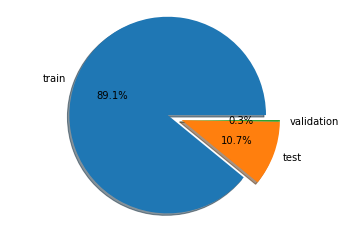

In [8]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'train','test','validation'
sizes = [train_dist,test_dist,val_dist]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0.15,0,0), labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

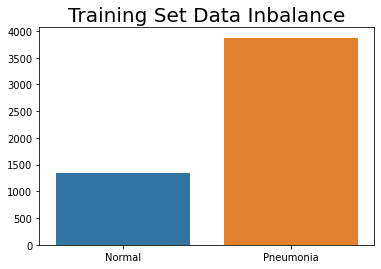

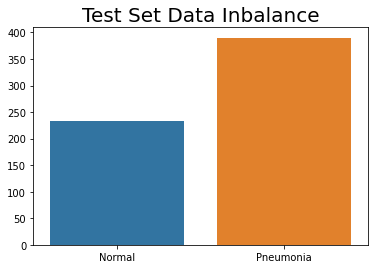

ValueError: ignored

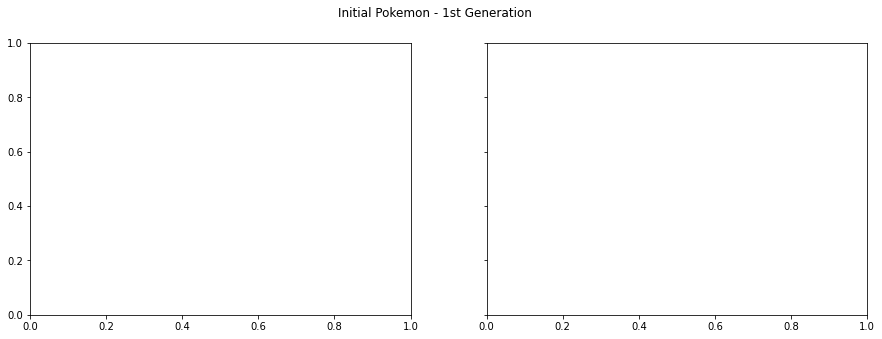

In [9]:
train_samplesize = pd.DataFrame.from_dict(
    {'Normal': [len([os.path.join(train_dir+'NORMAL', filename) 
                     for filename in os.listdir(train_dir+'NORMAL')])], 
     'Pneumonia': [len([os.path.join(train_dir+'PNEUMONIA', filename) 
                        for filename in os.listdir(train_dir+'PNEUMONIA')])]})


sns.barplot(data=train_samplesize).set_title('Training Set Data Inbalance', fontsize=20)
plt.show()

test_samplesize = pd.DataFrame.from_dict(
    {'Normal': [len([os.path.join(test_dir+'NORMAL', filename) 
                     for filename in os.listdir(test_dir+'NORMAL')])], 
     'Pneumonia': [len([os.path.join(test_dir+'PNEUMONIA', filename) 
                        for filename in os.listdir(test_dir+'PNEUMONIA')])]})


sns.barplot(data=test_samplesize).set_title('Test Set Data Inbalance', fontsize=20)
plt.show()





Text(0.5, 1.0, 'Training')

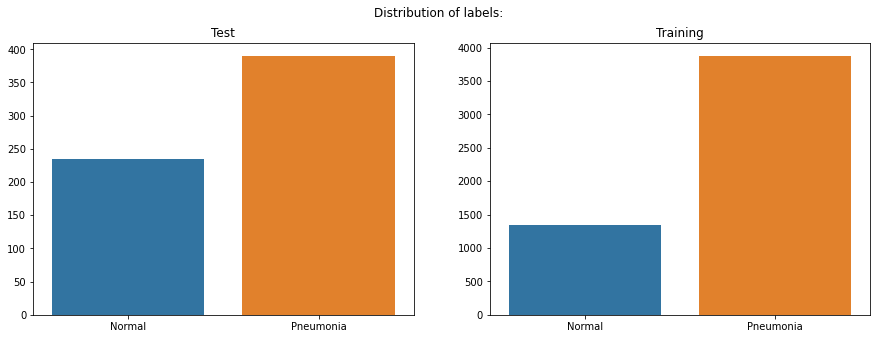

In [30]:



fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution of labels:')

# Bulbasaur
sns.barplot(ax=axes[0], data=test_samplesize)
axes[0].set_title("Test")

# Charmander
sns.barplot(ax=axes[1], data=train_samplesize)
axes[1].set_title("Training")



In [51]:
train_datas = []
for i in range(len(train_data)):
   train_datas.append([train_data[i], labels[i]])


trainloader = torch.utils.data.DataLoader(train_datas, shuffle=True, batch_size=10)
i1, l1 = next(iter(trainloader))
print(i1.shape)

IndexError: ignored

In [46]:
for a in next(iter(train_loader)):
  print(a[0].shape)


for batch in train_loader:
  print(batch['labels'])
  break
  outputs = model.training_step(batch, weight)
  loss = outputs['train_loss']                          # get the loss
  train_outputs.append(outputs)
  # get the train average loss and acc for each epoch
  train_results = model.train_epoch_end(train_outputs)                        
  loss.backward()                                       # compute gradients

  # Gradient clipping
  if grad_clip: 
      nn.utils.clip_grad_value_(model.parameters(), grad_clip)

  optimizer.step()                                      # update weights
  optimizer.zero_grad()                                 # reset gradients  

  #             Record & update learning rate
  #             lrs.append(get_lr(optimizer))
  #             sched.step()


torch.Size([3, 224, 224])
torch.Size([])


TypeError: ignored

In [52]:
train_loader[0].data

TypeError: ignored

In [ ]:
from sklearn.manifold import TSNE
# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(data_1000)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=(“Dim_1”, “Dim_2”, “label”))
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue=”label”, size=6).map(plt.scatter, ‘Dim_1’, ‘Dim_2’).add_legend()
plt.show()

load data and perform data augmentations

In [ ]:
from PIL import Image
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
#kolla vad data augment faktiskt har för inverkan på ett dataset.
print(val_dir+os.listdir(os.path.join(val_dir, 'NORMAL'))[0])

normal = Image.open(val_dir+os.listdir(os.path.join(val_dir, 'NORMAL'))[0])
pneu = Image.open(val_dir+os.listdir(os.path.join(val_dir, 'PNEUMONIA'))[0])

fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Normal X-ray', fontsize = 15)
plt.imshow(normal, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Pneumonia X-ray', fontsize = 15)
plt.imshow(pneu, cmap = 'gray')